In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import statsmodels.api as sm

In [5]:
df = pd.read_csv('monthly-milk-production-pounds-p.csv')

In [6]:
df.head()

Month  Monthly milk production: pounds per cow. Jan 62 ? Dec 75
0  1962-01                                              589.0       
1  1962-02                                              561.0       
2  1962-03                                              640.0       
3  1962-04                                              656.0       
4  1962-05                                              727.0

In [7]:
df.columns = ['Month','Milk in pounds per cow']

In [8]:
df.head()

Month  Milk in pounds per cow
0  1962-01                   589.0
1  1962-02                   561.0
2  1962-03                   640.0
3  1962-04                   656.0
4  1962-05                   727.0

In [9]:
df.tail()

Month  Milk in pounds per cow
164                                            1975-09                   817.0
165                                            1975-10                   827.0
166                                            1975-11                   797.0
167                                            1975-12                   843.0
168  Monthly milk production: pounds per cow. Jan 6...                     NaN

In [10]:
df.drop(168,axis=0,inplace=True)

In [11]:
df.tail()

Month  Milk in pounds per cow
163  1975-08                   858.0
164  1975-09                   817.0
165  1975-10                   827.0
166  1975-11                   797.0
167  1975-12                   843.0

In [12]:
df['Month'] = pd.to_datetime(df['Month'])

In [13]:
df.set_index('Month',inplace=True)

In [14]:
df.head()

Milk in pounds per cow
Month                             
1962-01-01                   589.0
1962-02-01                   561.0
1962-03-01                   640.0
1962-04-01                   656.0
1962-05-01                   727.0

In [15]:
df.index

DatetimeIndex(['1962-01-01', '1962-02-01', '1962-03-01', '1962-04-01',
               '1962-05-01', '1962-06-01', '1962-07-01', '1962-08-01',
               '1962-09-01', '1962-10-01',
               ...
               '1975-03-01', '1975-04-01', '1975-05-01', '1975-06-01',
               '1975-07-01', '1975-08-01', '1975-09-01', '1975-10-01',
               '1975-11-01', '1975-12-01'],
              dtype='datetime64[ns]', name='Month', length=168, freq=None)

In [16]:
df.describe().transpose()

count        mean         std    min     25%    50%  \
Milk in pounds per cow  168.0  754.708333  102.204524  553.0  677.75  761.0   

                          75%    max  
Milk in pounds per cow  824.5  969.0

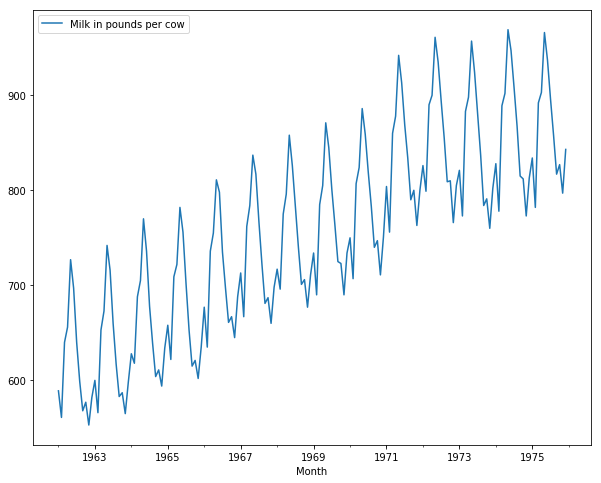

In [18]:
df.plot(figsize=(10,8));

In [19]:
time_series = df['Milk in pounds per cow']

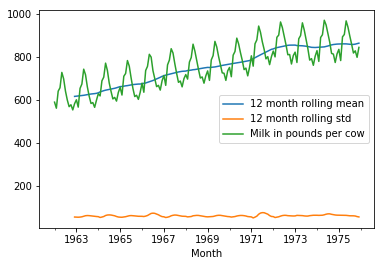

In [21]:
time_series.rolling(12).mean().plot(label = '12 month rolling mean')
time_series.rolling(12).std().plot(label = '12 month rolling std')
time_series.plot()
plt.legend();

In [22]:
from statsmodels.tsa.seasonal import seasonal_decompose

In [23]:
decomp = seasonal_decompose(time_series)

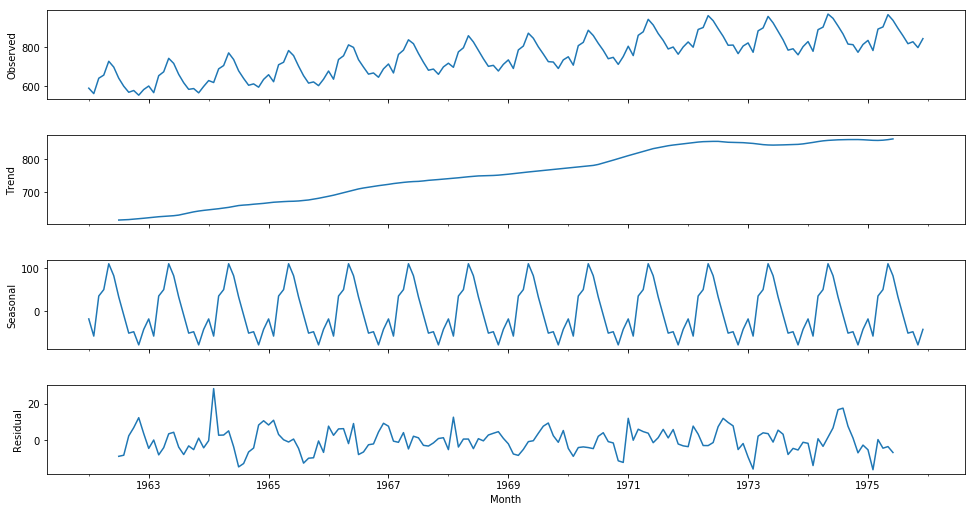

In [26]:
fig = decomp.plot()
fig.set_size_inches(15,8)

In [27]:
from statsmodels.tsa.stattools import adfuller

In [28]:
result = adfuller(df['Milk in pounds per cow'])

In [29]:
def adf_check(time_series):
    result = adfuller(time_series)
    print('Augmented Dicky-Fuller Test')
    labels = ['ADF test statistic','p-value','# of lags','num of observations used']
    
    for value,label in zip(result,labels):
        print(label+ " : "+str(value))
    if result[1] <= 0.05:
        print("Strong evidence against null hypothesis")
        print("reject null hypothesis")
    else :
        print("Weak evidence against null hypothesis")
        print('Fail to reject null hypothesis')
    

In [30]:
adf_check(df['Milk in pounds per cow'])

Augmented Dicky-Fuller Test
ADF test statistic : -1.3038115874221228
p-value : 0.6274267086030347
# of lags : 13
num of observations used : 154
Weak evidence against null hypothesis
Fail to reject null hypothesis


In [31]:
df['First Difference'] = df['Milk in pounds per cow'] - df['Milk in pounds per cow'].shift(1)

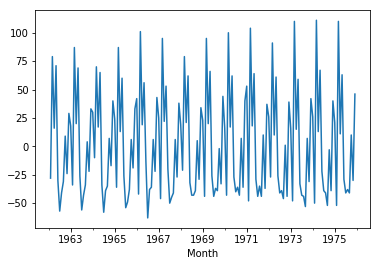

In [32]:
df['First Difference'].plot()

In [35]:
adf_check(df['Milk in pounds per cow'].dropna())

Augmented Dicky-Fuller Test
ADF test statistic : -1.3038115874221228
p-value : 0.6274267086030347
# of lags : 13
num of observations used : 154
Weak evidence against null hypothesis
Fail to reject null hypothesis


In [36]:
df['Second Difference'] = df['First Difference'] - df['First Difference'].shift(1)

In [37]:
adf_check(df['Second Difference'].dropna())

Augmented Dicky-Fuller Test
ADF test statistic : -14.327873645603349
p-value : 1.1126989332082667e-26
# of lags : 11
num of observations used : 154
Strong evidence against null hypothesis
reject null hypothesis


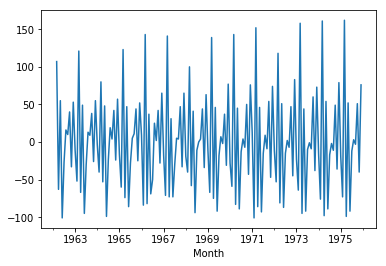

In [38]:
df['Second Difference'].plot()

In [39]:
df['Seasonal Difference'] = df['Milk in pounds per cow'] - df['Milk in pounds per cow'].shift(12)

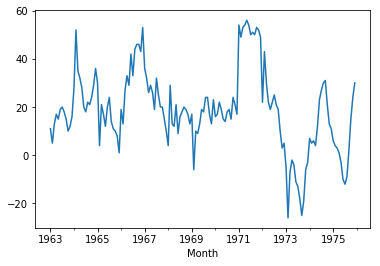

In [40]:
df['Seasonal Difference'].plot()

In [44]:
df['Seasonal first'] = df['First Difference'] - df['First Difference'].shift(12)

In [41]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

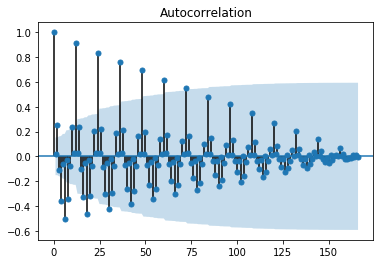

In [42]:
fig1 = plot_acf(df['First Difference'].dropna())

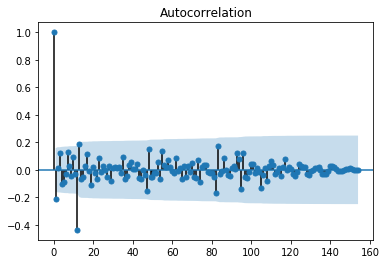

In [45]:
fig2 = plot_acf(df['Seasonal first'].dropna())

In [46]:
from pandas.plotting import autocorrelation_plot

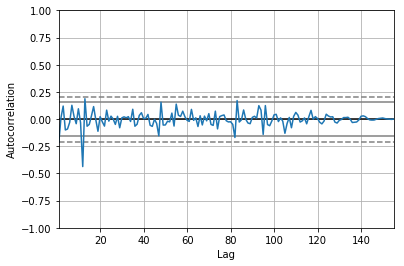

In [47]:
autocorrelation_plot(df['Seasonal first'].dropna())

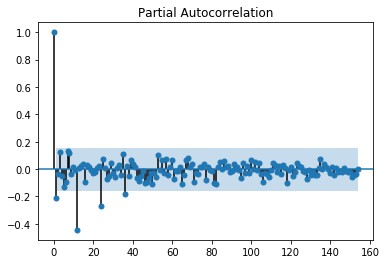

In [48]:
fig3 = plot_pacf(df['Seasonal first'].dropna())

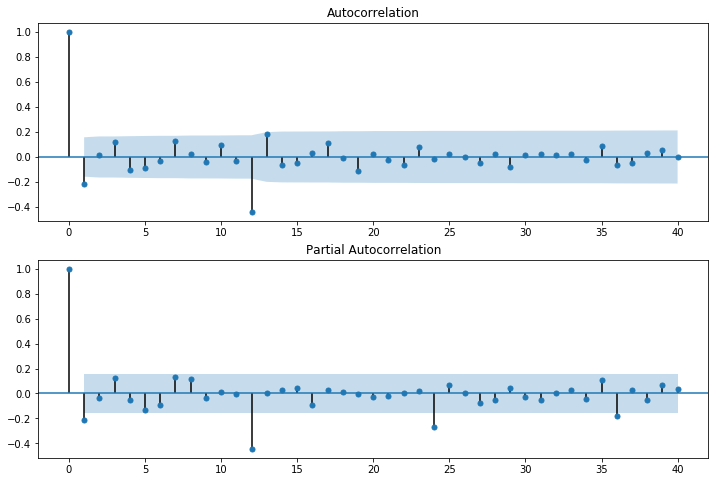

In [49]:
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(df['Seasonal first'].iloc[13:], lags=40, ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(df['Seasonal first'].iloc[13:], lags=40, ax=ax2)

In [50]:
from statsmodels.tsa.arima_model import ARIMA

In [51]:
model = sm.tsa.statespace.SARIMAX(df['Milk in pounds per cow'], order = (0,1,0), seasonal_order=(1,1,1,12))
results = model.fit()
print(results.summary())

                                 Statespace Model Results                                 
Dep. Variable:             Milk in pounds per cow   No. Observations:                  168
Model:             SARIMAX(0, 1, 0)x(1, 1, 1, 12)   Log Likelihood                -534.065
Date:                            Mon, 05 Nov 2018   AIC                           1074.131
Time:                                    00:00:58   BIC                           1083.503
Sample:                                01-01-1962   HQIC                          1077.934
                                     - 12-01-1975                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.S.L12      -0.0449      0.106     -0.422      0.673      -0.253       0.163
ma.S.L12      -0.5860      0.102   

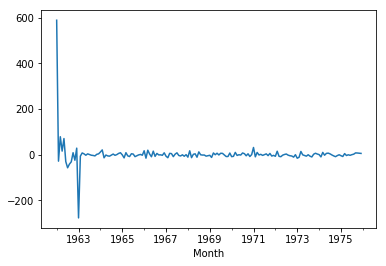

In [52]:
results.resid.plot();

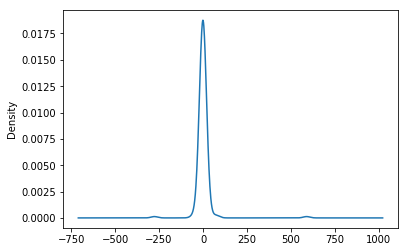

In [53]:
results.resid.plot(kind='kde');

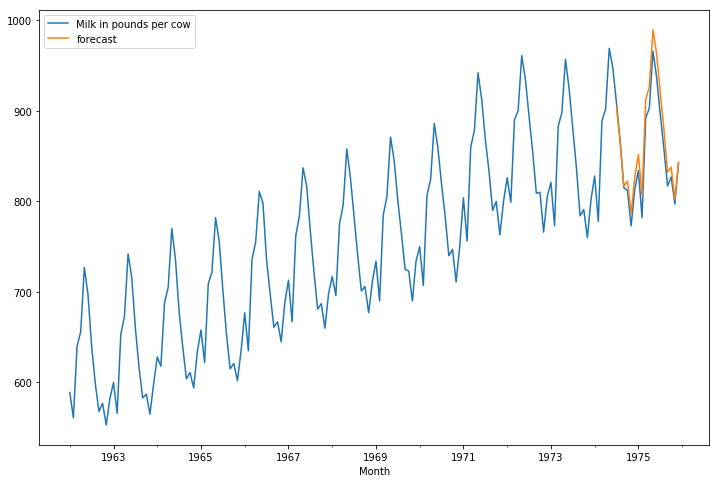

In [54]:
df['forecast'] = results.predict(start = 150, end= 168, dynamic= True)  
df[['Milk in pounds per cow','forecast']].plot(figsize=(12,8))

In [55]:
df.tail()

Milk in pounds per cow  First Difference  Second Difference  \
Month                                                                     
1975-08-01                   858.0             -38.0                3.0   
1975-09-01                   817.0             -41.0               -3.0   
1975-10-01                   827.0              10.0               51.0   
1975-11-01                   797.0             -30.0              -40.0   
1975-12-01                   843.0              46.0               76.0   

            Seasonal Difference  Seasonal first    forecast  
Month                                                        
1975-08-01                 -9.0             3.0  879.668789  
1975-09-01                  2.0            11.0  832.328246  
1975-10-01                 15.0            13.0  837.721945  
1975-11-01                 24.0             9.0  802.452363  
1975-12-01                 30.0             6.0  842.499524

In [56]:
from pandas.tseries.offsets import DateOffset

In [57]:
future_dates = [df.index[-1] + DateOffset(months=x) for x in range(0,24) ]

In [58]:
future_dates

[Timestamp('1975-12-01 00:00:00'),
 Timestamp('1976-01-01 00:00:00'),
 Timestamp('1976-02-01 00:00:00'),
 Timestamp('1976-03-01 00:00:00'),
 Timestamp('1976-04-01 00:00:00'),
 Timestamp('1976-05-01 00:00:00'),
 Timestamp('1976-06-01 00:00:00'),
 Timestamp('1976-07-01 00:00:00'),
 Timestamp('1976-08-01 00:00:00'),
 Timestamp('1976-09-01 00:00:00'),
 Timestamp('1976-10-01 00:00:00'),
 Timestamp('1976-11-01 00:00:00'),
 Timestamp('1976-12-01 00:00:00'),
 Timestamp('1977-01-01 00:00:00'),
 Timestamp('1977-02-01 00:00:00'),
 Timestamp('1977-03-01 00:00:00'),
 Timestamp('1977-04-01 00:00:00'),
 Timestamp('1977-05-01 00:00:00'),
 Timestamp('1977-06-01 00:00:00'),
 Timestamp('1977-07-01 00:00:00'),
 Timestamp('1977-08-01 00:00:00'),
 Timestamp('1977-09-01 00:00:00'),
 Timestamp('1977-10-01 00:00:00'),
 Timestamp('1977-11-01 00:00:00')]

In [60]:
future_dates_df = pd.DataFrame(index = future_dates[1:], columns = df.columns)

In [61]:
future_df = pd.concat([df,future_dates_df])

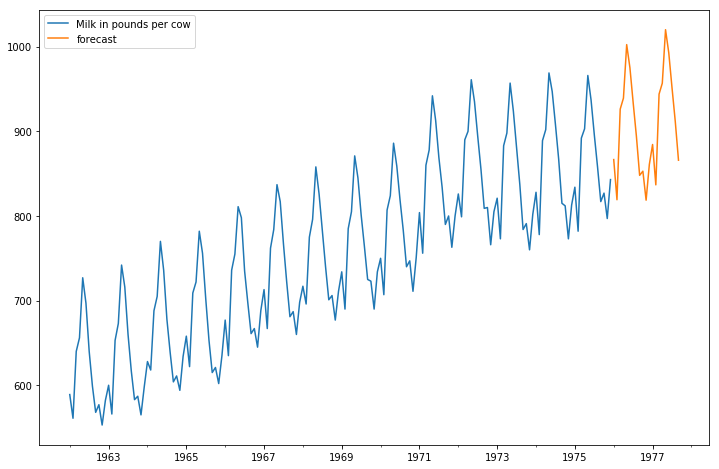

In [65]:
future_df['forecast'] = results.predict(start = 168, end = 188, dynamic= True)  
future_df[['Milk in pounds per cow', 'forecast']].plot(figsize=(12, 8)) ;

In [63]:
future_df

Milk in pounds per cow  First Difference  Second Difference  \
1962-01-01                   589.0               NaN                NaN   
1962-02-01                   561.0             -28.0                NaN   
1962-03-01                   640.0              79.0              107.0   
1962-04-01                   656.0              16.0              -63.0   
1962-05-01                   727.0              71.0               55.0   
1962-06-01                   697.0             -30.0             -101.0   
1962-07-01                   640.0             -57.0              -27.0   
1962-08-01                   599.0             -41.0               16.0   
1962-09-01                   568.0             -31.0               10.0   
1962-10-01                   577.0               9.0               40.0   
1962-11-01                   553.0             -24.0              -33.0   
1962-12-01                   582.0              29.0               53.0   
1963-01-01                   600.0              18.0              -11.0   
1963-02-01                   566.0             -34.0              -52.0   
1963-03-01                   653.0              87.0              121.0   
1963-04-01                   673.0              20.0              -67.0   
1963-05-01                   742.0              69.0               49.0   
1963-06-01                   716.0             -26.0              -95.0   
1963-07-01                   660.0             -56.0              -30.0   
1963-08-01                   617.0             -43.0               13.0   
1963-09-01                   583.0             -34.0                9.0   
1963-10-01                   587.0               4.0               38.0   
1963-11-01                   565.0             -22.0              -26.0   
1963-12-01                   598.0              33.0               55.0   
1964-01-01                   628.0              30.0               -3.0   
1964-02-01                   618.0             -10.0              -40.0   
1964-03-01                   688.0              70.0               80.0   
1964-04-01                   705.0              17.0              -53.0   
1964-05-01                   770.0              65.0               48.0   
1964-06-01                   736.0             -34.0              -99.0   
...                            ...               ...                ...   
1975-06-01                   937.0             -29.0              -92.0   
1975-07-01                   896.0             -41.0              -12.0   
1975-08-01                   858.0             -38.0                3.0   
1975-09-01                   817.0             -41.0               -3.0   
1975-10-01                   827.0              10.0               51.0   
1975-11-01                   797.0             -30.0              -40.0   
1975-12-01                   843.0              46.0               76.0   
1976-01-01                     NaN               NaN                NaN   
1976-02-01                     NaN               NaN                NaN   
1976-03-01                     NaN               NaN                NaN   
1976-04-01                     NaN               NaN                NaN   
1976-05-01                     NaN               NaN                NaN   
1976-06-01                     NaN               NaN                NaN   
1976-07-01                     NaN               NaN                NaN   
1976-08-01                     NaN               NaN                NaN   
1976-09-01                     NaN               NaN                NaN   
1976-10-01                     NaN               NaN                NaN   
1976-11-01                     NaN               NaN                NaN   
1976-12-01                     NaN               NaN                NaN   
1977-01-01                     NaN               NaN                NaN   
1977-02-01                     NaN               NaN                NaN   
1977-03-01                     NaN   